# D214 Capstone
# Modeling Inflation Adusted Recessionary Lumber Prices
# November 1973- March 1975 Recession
## Eric Yarger

# Import Packages

In [1]:
# Import Initial Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.tsa.stattools import adfuller
import statsmodels
import datetime
import platform
from pmdarima.arima import ndiffs
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.graphics.tsaplots import plot_pacf
import warnings
from scipy import signal
from pmdarima.arima import StepwiseContext
from pmdarima.arima import auto_arima
from pmdarima.model_selection import train_test_split

### Environment

In [2]:
# Windows 10, Anaconda, JupyterLab, JupyterNotebook
# Jupyter environment version
!jupyter --version

Selected Jupyter core packages...
IPython          : 7.31.1
ipykernel        : 6.15.2
ipywidgets       : not installed
jupyter_client   : 7.3.5
jupyter_core     : 4.10.0
jupyter_server   : 1.18.1
jupyterlab       : 3.4.4
nbclient         : 0.5.13
nbconvert        : 6.4.4
nbformat         : 5.5.0
notebook         : 6.4.12
qtconsole        : not installed
traitlets        : 5.1.1


In [3]:
# Python Version
print(platform.python_version())

3.7.13


In [4]:
#Load Medical Dataset 
df = pd.read_csv('C:/Users/ericy/Desktop/lumber_trading_days_adj.csv')

# November 16 1973 to March 31, 1975
## 42% of Trading Days are Pre-Recession, 58% are In-Recession

In [5]:
#------ Select Data Set for Recession
df = df[:591]

In [6]:
df

,Date,Trading Days,2022_Value,Value
0,1972-11-16,1,865.416,128.4
1,1972-11-17,2,865.416,128.4
2,1972-11-20,3,865.416,128.4
3,1972-11-21,4,855.980,127.0
4,1972-11-27,5,856.654,127.1
...,...,...,...,...
586,1975-03-24,587,734.800,133.6
587,1975-03-25,588,746.900,135.8
588,1975-03-26,589,741.950,134.9
589,1975-03-27,590,755.150,137.3


# D1: Exploratory Data Analysis

In [7]:
df = df[['Trading Days','2022_Value']]

In [8]:
df

,Trading Days,2022_Value
0,1,865.416
1,2,865.416
2,3,865.416
3,4,855.980
4,5,856.654
...,...,...
586,587,734.800
587,588,746.900
588,589,741.950
589,590,755.150


# EDA

In [9]:
df.head()

,Trading Days,2022_Value
0,1,865.416
1,2,865.416
2,3,865.416
3,4,855.980
4,5,856.654


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Trading Days  591 non-null    int64  
 1   2022_Value    591 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 9.4 KB


In [11]:
df.shape

(591, 2)

In [12]:
df.describe()

,Trading Days,2022_Value
count,591.000000,591.000000
mean,296.000000,848.870626
std,170.751281,119.660087
min,1.000000,588.650000
25%,148.500000,756.400000
50%,296.000000,852.170000
75%,443.500000,935.712000
max,591.000000,1111.320000


In [13]:
df.isnull().any()

Trading Days    False
2022_Value      False
dtype: bool

## Line Graph Visualization

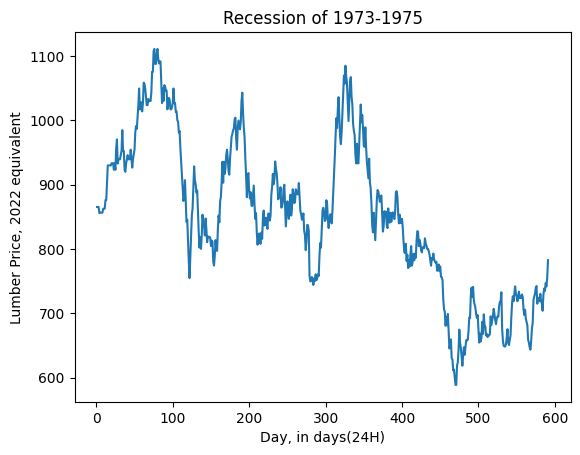

In [14]:
#-------
plt.plot(df['Trading Days'],df['2022_Value'])
plt.title('Recession of 1973-1975')
plt.xlabel('Day, in days(24H)')
plt.ylabel('Lumber Price, 2022 equivalent')
plt.show()

# Data Cleaning

In [15]:
# Drop any null columns
df = df.dropna()

# D2: Time Step Formatting, Indexing



### Set df['Trading Days'] to Index

In [16]:
# Day to datetime
df['Trading Days'] = pd.to_datetime(df['Trading Days'], unit='D')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591 entries, 0 to 590
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Trading Days  591 non-null    datetime64[ns]
 1   2022_Value    591 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.9 KB


In [18]:
# Set Day as Index
df.set_index('Trading Days',inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 591 entries, 1970-01-02 to 1971-08-15
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   2022_Value  591 non-null    float64
dtypes: float64(1)
memory usage: 9.2 KB


In [20]:
df

,2022_Value
Trading Days,
1970-01-02,865.416
1970-01-03,865.416
1970-01-04,865.416
1970-01-05,855.980
1970-01-06,856.654
...,...
1971-08-11,734.800
1971-08-12,746.900
1971-08-13,741.950


# D3 Stationarity Analysis
### Augmented Dickey Fuller (ADF) Test
### Assess stationarity of dataset

In [21]:
# Code Reference (Making time series stationary | Python, n.d.)
dicky_fuller_test = adfuller(df)

In [22]:
dicky_fuller_test

(-1.8272400283661347,
 0.3670240751916377,
 2,
 588,
 {'1%': -3.44152019959894,
  '5%': -2.8664679191981297,
  '10%': -2.569394451038919},
 4911.6844472068815)

In [23]:
# Results show p = .36702
# Data does not reject null hypothesis at p < .05
# Therefore, Time series is determined to be non-stationary

# D4 Differencing
## 1st and 2nd order Differencing
### finding 'd' for ARIMA model

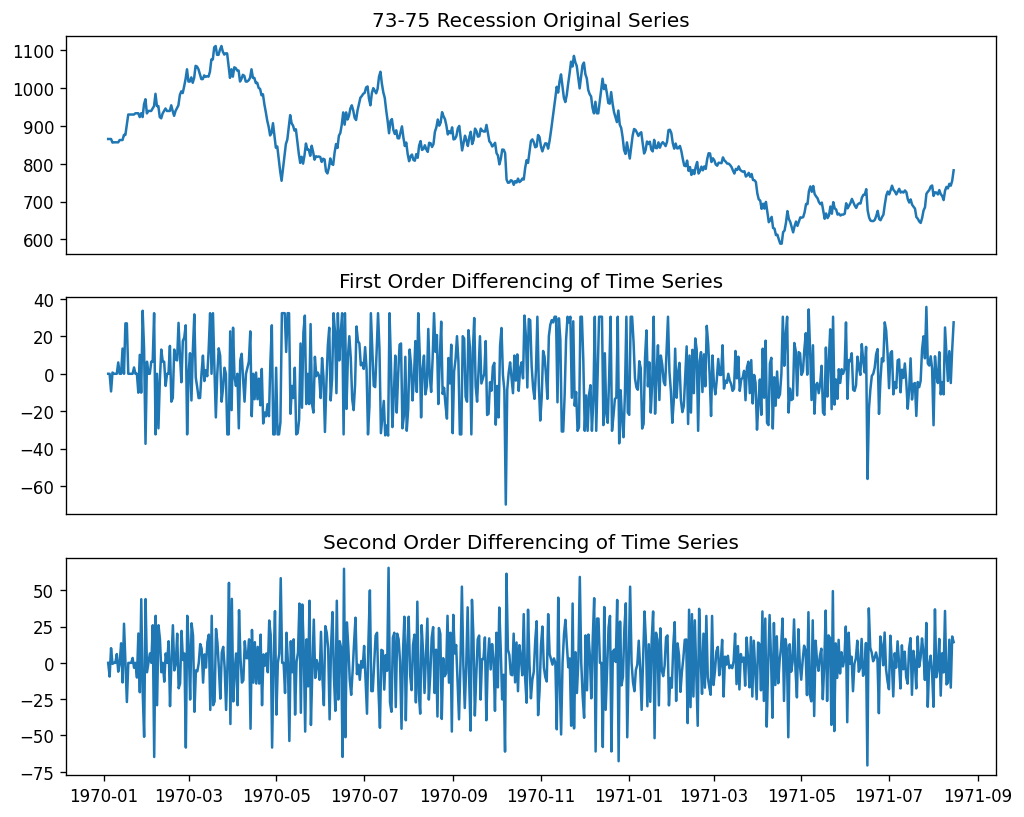

In [24]:
# Set plot parameters for multi-ax subplots
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':120})
 
# Establish that there are three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3)

# Plot the original dataset 
ax1.plot(df); ax1.set_title('73-75 Recession Original Series'); ax1.axes.xaxis.set_visible(False)

# First Order differencing of Time Series 
ax2.plot(df.diff()); ax2.set_title('First Order Differencing of Time Series'); ax2.axes.xaxis.set_visible(False)

# Second Order Differencing of Time Series
ax3.plot(df.diff().diff()); ax3.set_title('Second Order Differencing of Time Series')

# Plot all three graphs
plt.show()

In [25]:
# Using pmdarima's ndiffs to find differencing term
# Code reference (Verma, 2021)

kpss_diffs = ndiffs(df, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(df, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"Estimated differencing term: {n_diffs}")

Estimated differencing term: 1


# D5 Seasonality Analysis

In [26]:
# Code Reference (Boston, 2020)
result = seasonal_decompose(df)

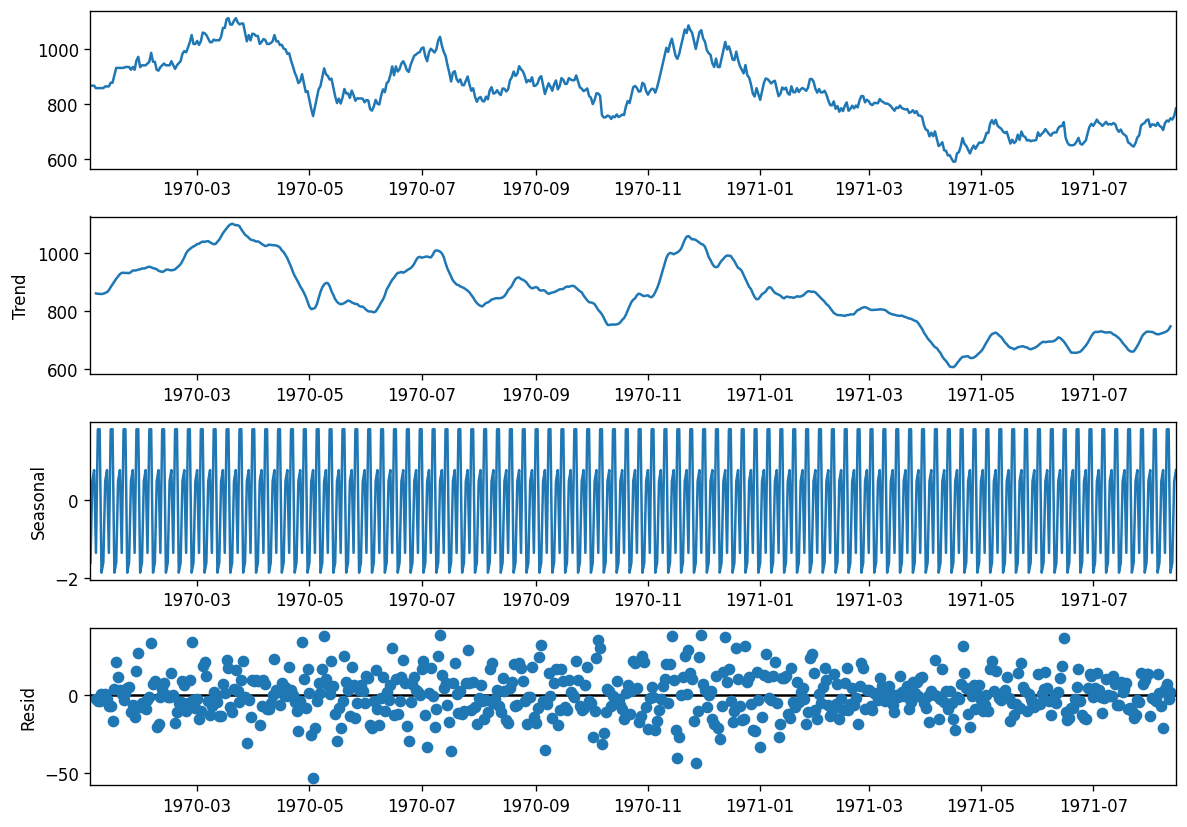

In [27]:
# plotting the result of our seasonal decomposition from the step above
rcParams['figure.figsize'] = 10,7
result.plot();

# D6 ACF and PACF

## Finding order of MA term 'q'
### Using Autocorrelation function (ACF)

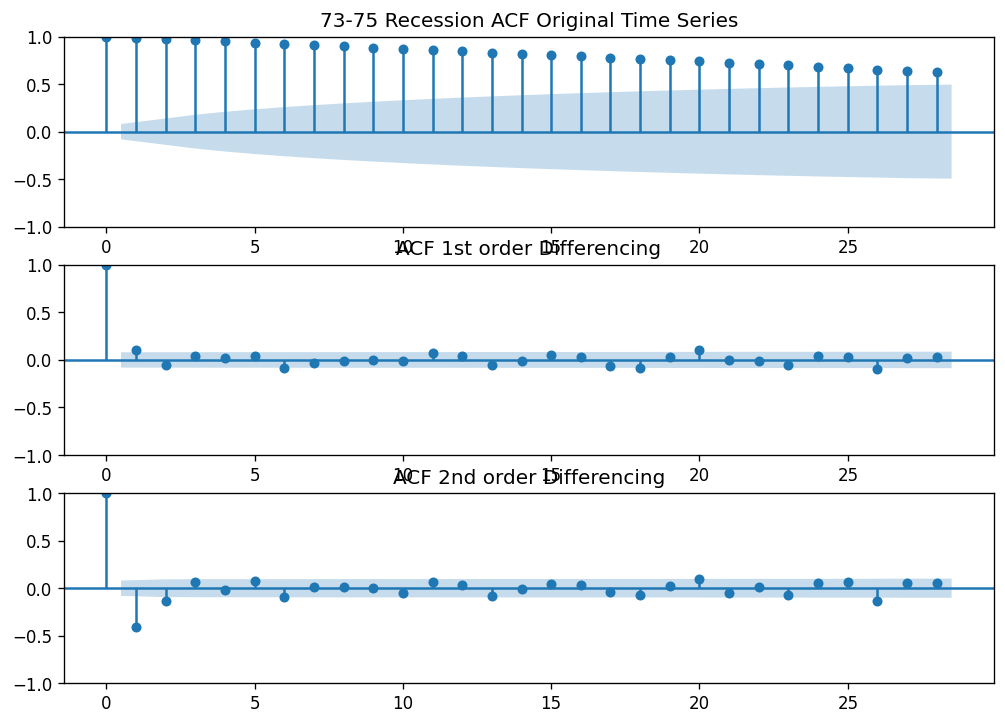

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(df, ax=ax1, title='73-75 Recession ACF Original Time Series');
plot_acf(df.diff().dropna(), ax=ax2, title='ACF 1st order Differencing');
plot_acf(df.diff().diff().dropna(), ax=ax3, title='ACF 2nd order Differencing');

## Finding order of AR term 'p'
### Using Partial autocorrelation (PACF)

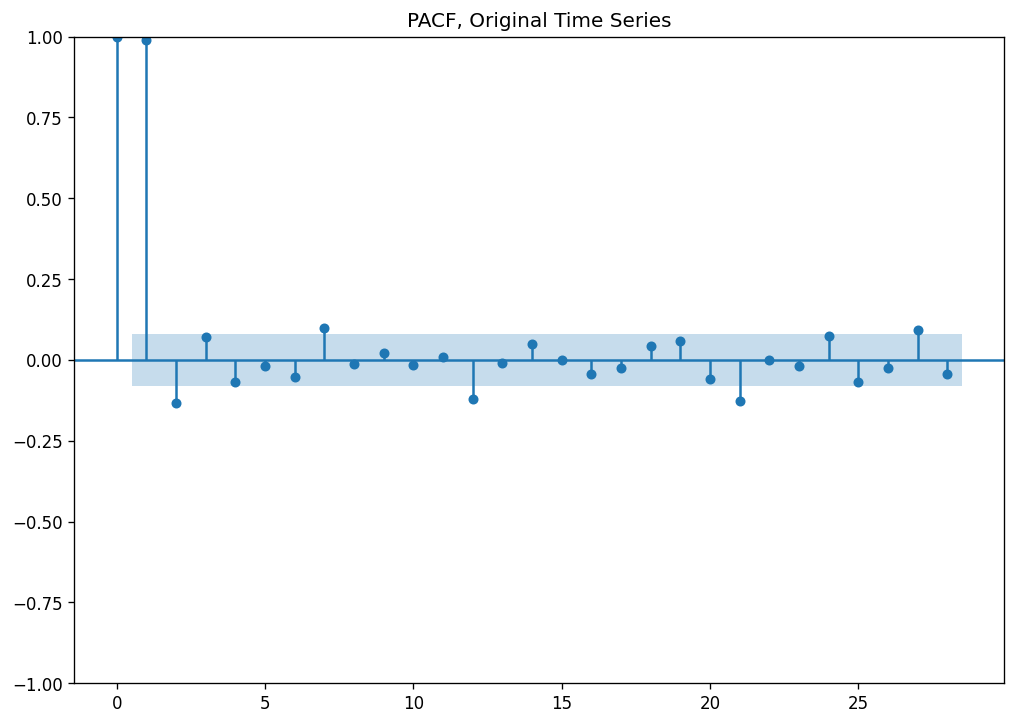

In [29]:
warnings.filterwarnings("ignore")
plot_pacf(df.dropna(), title='PACF, Original Time Series');

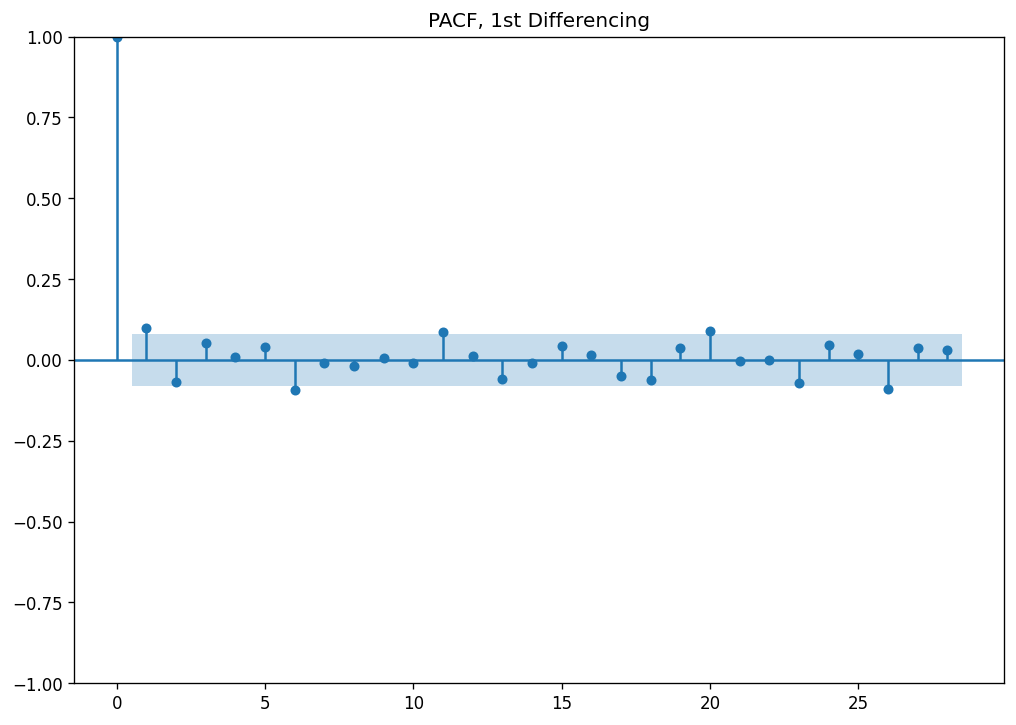

In [30]:
plot_pacf(df.diff().dropna(), title='PACF, 1st Differencing');

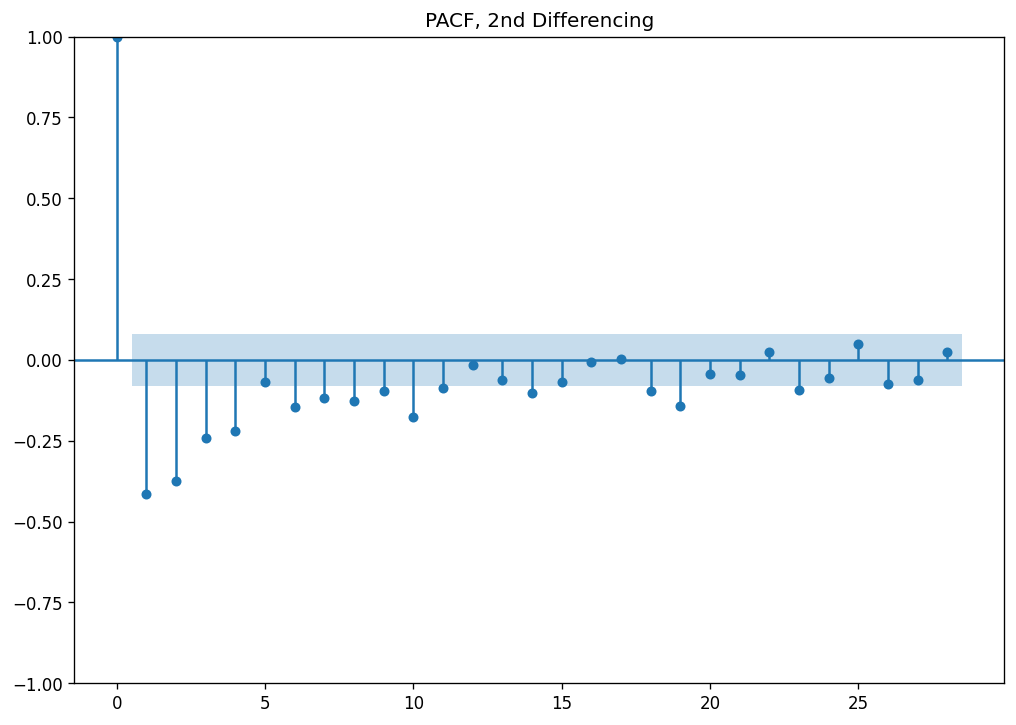

In [31]:
plot_pacf(df.diff().diff().dropna(), title='PACF, 2nd Differencing');

# D7 Spectral Density

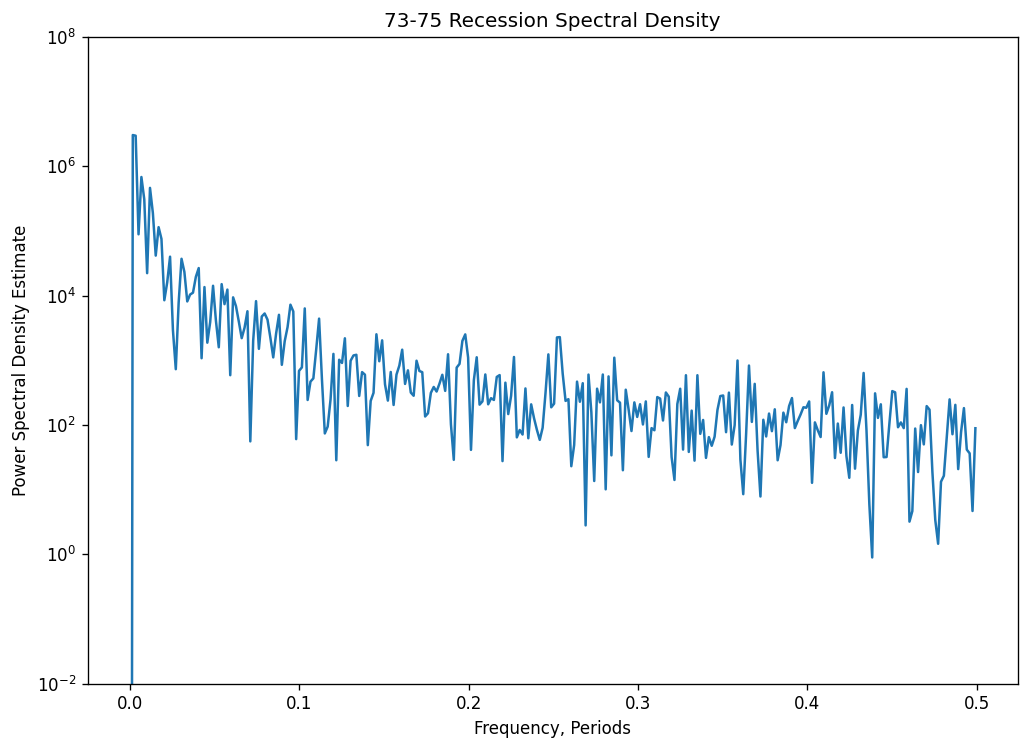

In [32]:
# Code Reference (Festus, 2022)

# signal periodogram
f, Pxx_den = signal.periodogram(df['2022_Value'])

# plotting semilogy - pyplot module used to make a plot with log scaling on the y-axis
plt.semilogy(f, Pxx_den)

# Setting coordinate values and titles for Spectral Density Graph
# setting y-axis min and max value
plt.ylim(1e-2, 1e8)

# Graph Title
plt.title('73-75 Recession Spectral Density')

# X label for Periods
plt.xlabel('Frequency, Periods')

# Y Label for SD Estimate
plt.ylabel('Power Spectral Density Estimate')
plt.show()

# D8 Create Train/Test Datasets

## Dataset Size = 591 cases
## 80/20 Train/Test Split
## Split is 472 / 119

In [33]:
# ------Splitting data into Test and Train sets using pmdarima's train_test_split
# code reference (Smith, 2019)

train, test = train_test_split(df, train_size=472)

In [34]:
train

,2022_Value
Trading Days,
1970-01-02,865.416
1970-01-03,865.416
1970-01-04,865.416
1970-01-05,855.980
1970-01-06,856.654
...,...
1971-04-14,612.440
1971-04-15,599.630
1971-04-16,588.650


In [35]:
test

,2022_Value
Trading Days,
1971-04-19,623.42
1971-04-20,644.16
1971-04-21,674.66
1971-04-22,653.92
1971-04-23,645.99
...,...
1971-08-11,734.80
1971-08-12,746.90
1971-08-13,741.95


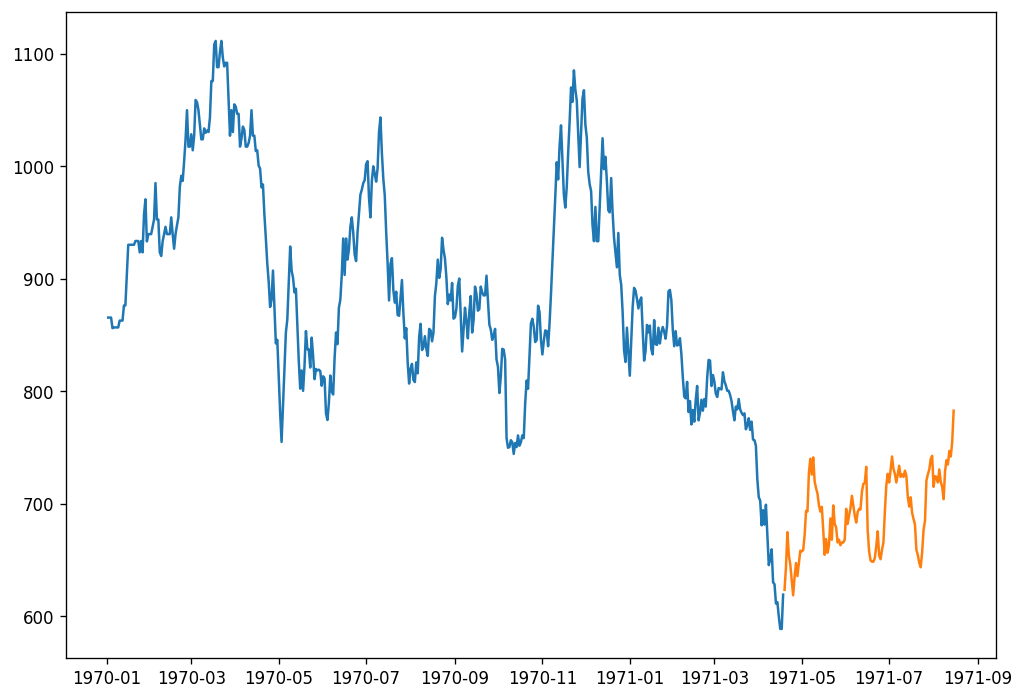

In [36]:
# Plot training data
plt.plot(train)

# Plot Test Data
plt.plot(test)

In [37]:
print(train.shape)
print(test.shape)

(472, 1)
(119, 1)


# D9 Auto-arima ARIMA Modeling
## Using pmdarima's auto_arima

In [38]:
# Fit the model using auto_arima
# Auto-arima code reference (6. Tips to using auto_arima — pmdarima 2.0.1 documentation, n.d.)
# Additional code reference (Pmdarima.arima.AutoARIMA — pmdarima 2.0.1 documentation, n.d.)
# Auto-arima, initial parameter attempt
# Code Reference (Kosaka, 2021)

# Establish auto_arima to run ARIMA and take into account
# Any Seasonality of the data, and any trends found.
model = auto_arima(train, start_p=1, start_q=1,
                   test='adf',
                   max_p=3,
                   max_q=3,
                   max_d=3,
                   seasonal=True,
                   stationarity=False,
                   seasonal_test='ocsb',
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True,
                  trend='c')

# Print Summary of Best AIC Minimized SARIMAX Model
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4078.620, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4085.328, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4081.977, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4080.759, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4085.328, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4080.594, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4080.588, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4079.276, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4079.655, Time=0.08 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4081.060, Time=0.51 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=4078.620, Time=0.13 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 1.780 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  

In [68]:
model = auto_arima(train, trace=True)

# Print Summary of Best AIC Minimized SARIMAX Model
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4081.060, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4085.328, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4081.977, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4080.759, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4083.707, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4078.620, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4080.594, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4080.588, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4079.276, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4079.655, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=4076.950, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4079.050, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=4080.274, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=4078.918, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0]          

In [40]:
model.conf_int()

,0,1
ar.L1,-0.925237,-0.305514
ma.L1,0.469487,1.001738
sigma2,283.553386,380.134178


# Visualizing Model Results

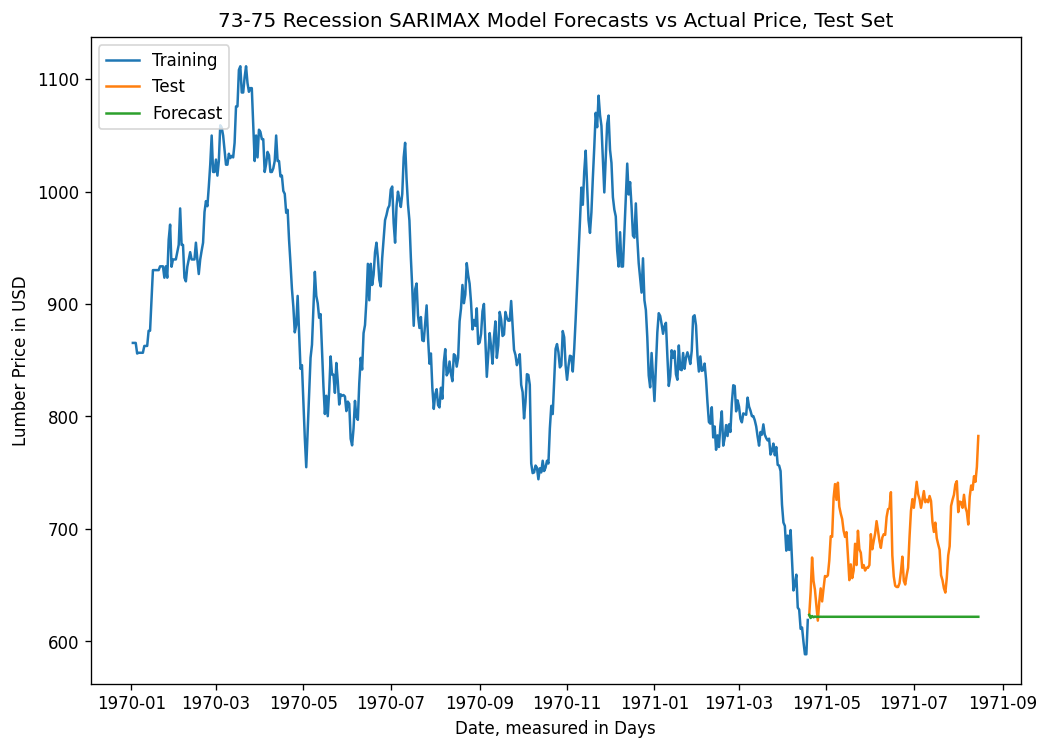

In [41]:
# Prediction assignment, predicted revenue column named
# Training, Test, and Predicted data plotted together
# Code Reference (Matplotlib.pyplot.plot — Matplotlib 3.6.0 documentation, n.d.)

# ------Creating varible with forecast values
forecast = pd.DataFrame(model.predict(n_periods = 119))

# Naming forecast_revenue column in forecast variable
forecast.columns = ['forecast_prices']

# Establish plot parameters for Forecast

# Plot figure size
plt.figure(figsize=(10,7))

# Training data
plt.plot(train,label="Training")

# Annotate X-axis label
plt.xlabel('Date, measured in Days')

# Annotate Y-axis label
plt.ylabel('Lumber Price in USD')

# Annotate Plot Title
plt.title('73-75 Recession SARIMAX Model Forecasts vs Actual Price, Test Set')

# Plot Test Data
plt.plot(test,label="Test")

# Plot Forecast Data
plt.plot(forecast,label="Forecast")

# Plot legend in upper lefthand corner
plt.legend(loc = 'upper left')

# Show Plot
plt.show()

In [42]:
forecast

,forecast_prices
1971-04-19,623.707215
1971-04-20,620.902817
1971-04-21,622.628574
1971-04-22,621.566586
1971-04-23,622.220107
...,...
1971-08-11,621.971149
1971-08-12,621.971149
1971-08-13,621.971149
1971-08-14,621.971149


# D10 Accuracy Metrics for our forecast

In [43]:
# RMSE and MAE to test model accuracy

In [44]:
# Create array of actual Revenue values, stored in Test variable

test_array = test[['2022_Value']].to_numpy()
#test_array

In [45]:
test_array.shape

(119, 1)

In [46]:
forecast

,forecast_prices
1971-04-19,623.707215
1971-04-20,620.902817
1971-04-21,622.628574
1971-04-22,621.566586
1971-04-23,622.220107
...,...
1971-08-11,621.971149
1971-08-12,621.971149
1971-08-13,621.971149
1971-08-14,621.971149


In [47]:
# Predictions to numpy array
predicted_array = forecast[['forecast_prices']].to_numpy()

In [48]:
predicted_array.shape

(119, 1)

In [49]:
#RMSE Calculation

rmse = sqrt(mean_squared_error(test_array, predicted_array))
print ('RMSE = ' + str(rmse))

RMSE = 78.186066504359


In [50]:
# MAE Calculation

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

true = test_array
predicted = predicted_array

print(mae(true, predicted))

70.57468763141186


# D11 Visualizing Model Forecast Confidence Intervals at 20% CI

In [51]:
# Model Standard Error calculations, computed numerical Hessian

std_error = model.bse()
print(std_error)

ar.L1      0.158096
ma.L1      0.135781
sigma2    24.638410
dtype: float64


In [52]:
# Generate Model confidence intervals

conf_int = model.conf_int()

In [53]:
# ------Generate Forecast Prediction Intervals at 90% Confidence

y_forec, conf_int = model.predict(119, return_conf_int=True, alpha=0.8)
print(conf_int)

[[619.09209712 628.3223326 ]
 [613.97255839 627.83307539]
 [614.18207398 631.0750749 ]
 [611.73135695 631.40181441]
 [611.22767068 633.21254422]
 [609.74635657 633.88953588]
 [609.02216462 635.10868809]
 [607.9550276  635.87123874]
 [607.19649082 636.81721048]
 [606.32938584 637.56897259]
 [605.59749461 638.37184299]
 [604.84138486 639.0842739 ]
 [604.15151433 639.80102331]
 [603.46621182 640.46978523]
 [602.81844449 641.12773123]
 [602.18383057 641.75608144]
 [601.5739085  642.36985804]
 [600.97864361 642.96275095]
 [600.40168378 643.54117044]
 [599.83859857 644.10335741]
 [599.29020351 644.65230523]
 [598.7543177  645.18785089]
 [598.23079661 645.7115813 ]
 [597.7184065  646.22384259]
 [597.21672299 646.72560537]
 [596.72494339 647.21733619]
 [596.24260106 647.69970854]
 [595.76911244 648.17317869]
 [595.30404433 648.63825817]
 [594.84693993 649.09535557]
 [594.39741776 649.54488204]
 [593.95510387 649.98719328]
 [593.5196676  650.42263118]
 [593.09079446 650.85150333]
 [592.66819836

In [54]:
# Assign Predictions to pandas DataFrame

conf_pd = pd.DataFrame(conf_int, columns =['Low_Prediction','High_Prediction'])

#Assign Low predictions to variable
low_prediction = conf_pd['Low_Prediction']

#Assign High predictions to variable
high_prediction = conf_pd['High_Prediction']

In [55]:
# Read out Test and Train sets to csv file
# Open csv files in Google Sheets, Add Day Column
# Dates align with 'test' variable, which contains actual revenue figures

low_prediction.to_csv('C:/Users/ericy/Desktop/Low_Prediction.csv')
high_prediction.to_csv('C:/Users/ericy/Desktop/High_Prediction.csv')

In [56]:
#-----Load predictions, date column added

low_pred = pd.read_csv('C:/Users/ericy/Desktop/7375_Low_Predictionz.csv')
high_pred = pd.read_csv('C:/Users/ericy/Desktop/7375_High_Predictionz.csv')

In [57]:
# Variable exploration to ensure compatability with 'test' datetime timeframe
low_pred

,Date,Low_Prediction
0,1971-04-19,619.092097
1,1971-04-20,613.972558
2,1971-04-21,614.182074
3,1971-04-22,611.731357
4,1971-04-23,611.227671
...,...,...
114,1971-08-11,568.813766
115,1971-08-12,568.582991
116,1971-08-13,568.353209
117,1971-08-14,568.124408


In [58]:
# Variable exploration to ensure compatability with 'test' datetime timeframe
high_pred

,Date,High_Prediction
0,1971-04-19,628.322333
1,1971-04-20,627.833075
2,1971-04-21,631.075075
3,1971-04-22,631.401814
4,1971-04-23,633.212544
...,...,...
114,1971-08-11,675.128532
115,1971-08-12,675.359307
116,1971-08-13,675.589089
117,1971-08-14,675.817890


## Convert Low and High Prediction 'Day' column to datetime and index

In [59]:
# Lower Predictions, Set Day as Index
low_pred['Date'] = pd.to_datetime(low_pred['Date'])

In [60]:
low_pred.set_index('Date',inplace=True)

In [61]:
# High Predictions, Day to datetime
high_pred['Date'] = pd.to_datetime(high_pred['Date'])

In [62]:
# High Predictions, Set Day as Index
high_pred.set_index('Date',inplace=True)

In [63]:
low_pred

,Low_Prediction
Date,
1971-04-19,619.092097
1971-04-20,613.972558
1971-04-21,614.182074
1971-04-22,611.731357
1971-04-23,611.227671
...,...
1971-08-11,568.813766
1971-08-12,568.582991
1971-08-13,568.353209


In [64]:
high_pred

,High_Prediction
Date,
1971-04-19,628.322333
1971-04-20,627.833075
1971-04-21,631.075075
1971-04-22,631.401814
1971-04-23,633.212544
...,...
1971-08-11,675.128532
1971-08-12,675.359307
1971-08-13,675.589089


# SARIMAX Model Forecast, With Confidence Interval = 20%, Vs Test Set

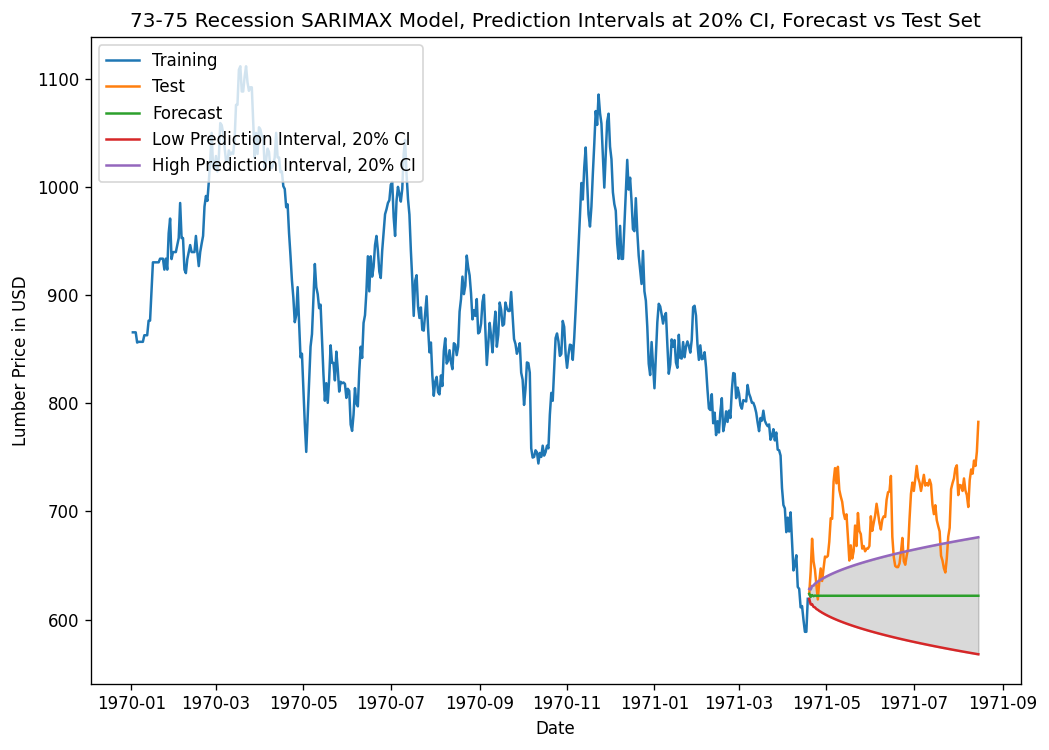

In [65]:
# Prediction assignment, predicted revenue column named
# Training, Test, and Predicted data plotted together
# Code Reference (Matplotlib.pyplot.plot — Matplotlib 3.6.0 documentation, n.d.)

# -----Creating varible with forecast values
forecast = pd.DataFrame(model.predict(n_periods = 119),index=test.index)

# Naming forecast_revenue column in forecast variable
forecast.columns = ['forecast_prices']

# Establish plot parameters for Forecast

# Plot figure size
plt.figure(figsize=(10,7))

# Training data
plt.plot(train,label="Training")

# Annotate X-axis label
plt.xlabel('Date')

# Annotate Y-axis label
plt.ylabel('Lumber Price in USD')

# Annotate Plot Title
plt.title('73-75 Recession SARIMAX Model, Prediction Intervals at 20% CI, Forecast vs Test Set')

# Plot Test Data
plt.plot(test,label="Test")

# Plot Forecast Data
plt.plot(forecast,label="Forecast")

# Add Prediction Interval at 95% CI
plt.plot(low_pred,label='Low Prediction Interval, 20% CI')
plt.plot(high_pred,label='High Prediction Interval, 20% CI')
plt.fill_between(low_pred.index, low_pred['Low_Prediction'], high_pred['High_Prediction'], color='k', alpha=.15)

# Plot legend in upper lefthand corner
plt.legend(loc = 'upper left')


# Show Plot
plt.show()

# Is the null hypothesis Accepted or Rejected?

In [66]:
# Accept or reject the Null Hypothesis
# 73-73 Recession we Accept the Null Hypothesis